# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = "58bb99634c1218bd395584893d21bfea"

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Start Data Retrieval     ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for x, city in enumerate(cities):
    
    if (x % 50 ==0 and x >= 50):
        set_count =+ 1
        record_count = 0
    
    city_url = url + "&q=" + city
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(city_url)
    
    record_count = 1
    
    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
        
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Start Data Retrieval     
----------------------------
Processing Record 1 of Set 1 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58bb99634c1218bd395584893d21bfea&q=puerto del rosario
Processing Record 1 of Set 1 | urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58bb99634c1218bd395584893d21bfea&q=urengoy
Processing Record 1 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58bb99634c1218bd395584893d21bfea&q=saskylakh
Processing Record 1 of Set 1 | pirojpur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58bb99634c1218bd395584893d21bfea&q=pirojpur
Processing Record 1 of Set 1 | bargal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58bb99634c1218bd395584893d21bfea&q=bargal
City not found. Skipping...
Processing Record 1 of Set 1 | moose factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58bb99634c1218bd395584893d21

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto del rosario,100,ES,1587600364,72,28.50,-13.86,64.40,11.41
1,urengoy,91,RU,1587600364,89,65.97,78.37,36.14,22.53
2,saskylakh,80,RU,1587600244,96,71.92,114.08,19.36,4.36
3,pirojpur,51,BD,1587600364,89,22.57,89.98,75.70,3.49
4,moose factory,1,CA,1587600364,52,51.26,-80.61,17.60,12.75


In [6]:
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

In [7]:
city_data_pd.to_csv(output_data_file, index_label = "City_ID")

In [8]:
city_data_pd.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

city_data.pd.count()

#### Latitude vs. Temperature Plot

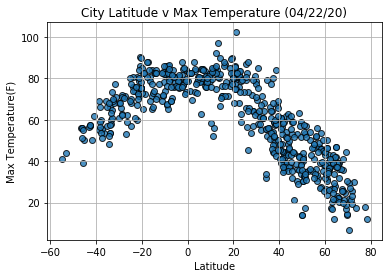

In [9]:
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude v Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)

plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

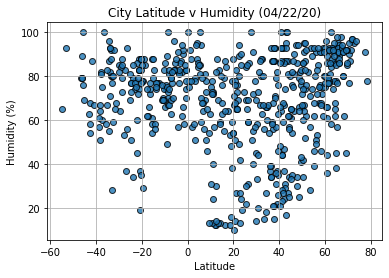

In [10]:
plt.scatter(lats, humidity, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude v Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

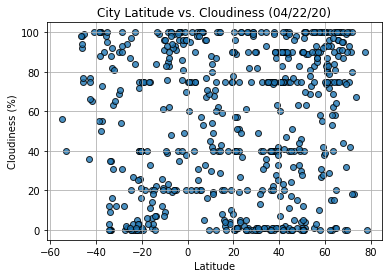

In [12]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

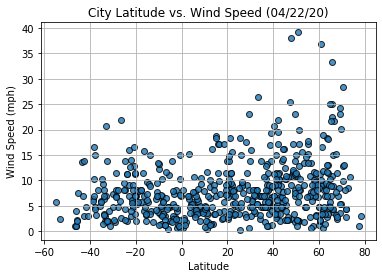

In [14]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1, marker="o", alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("output_data/Fig4.png")
plt.show()